In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
sys.path.append("..")
from utils import label_map_util
from utils import visualization_utils as vis_util
%matplotlib inline

c:\users\default.laptop-2ci68m4p\anaconda3\envs\tensorflow1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
c:\tensorflow1\models\research\object_detection\utils\visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\default.laptop-2ci68m4p\anaconda3\envs\tensorflow1\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\default.laptop-2ci68m4p\anaconda3\envs\tensorflow1\lib\runpy.py", line 85, in _run_code
  

In [2]:
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test1.jpg'

CWD_PATH = os.getcwd()

PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)
NUM_CLASSES = 6

In [3]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [4]:
def display(pic):
    plt.imshow(pic)
    plt.show()

In [5]:
def predict():
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: image_expanded})

    vis_util.visualize_boxes_and_labels_on_image_array(
        image,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.80)

    display(image)

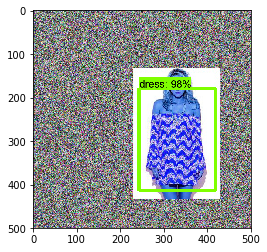

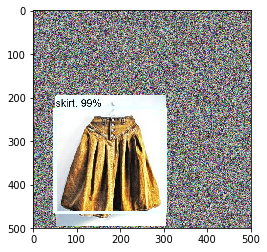

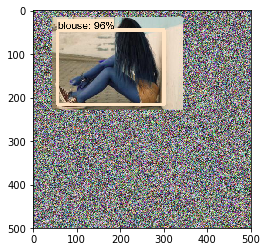

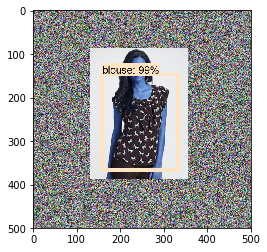

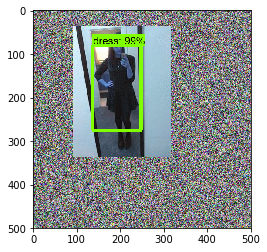

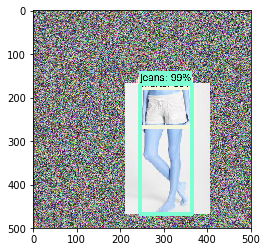

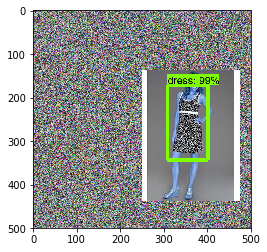

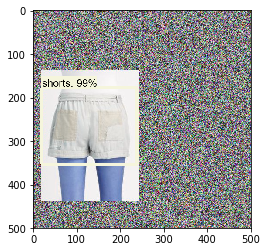

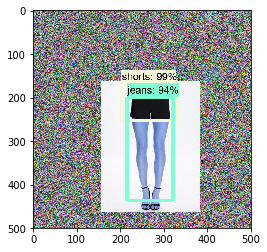

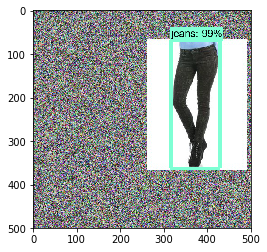

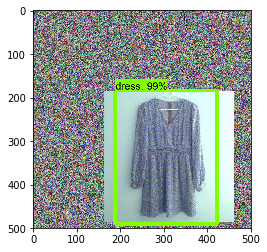

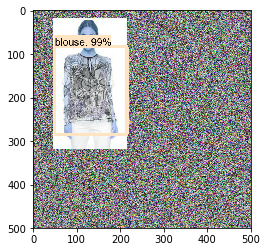

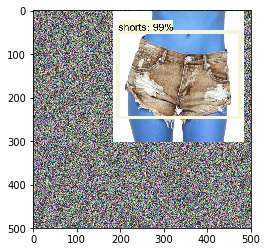

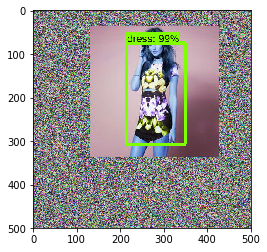

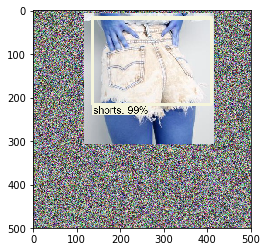

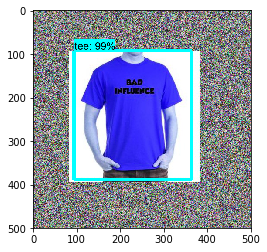

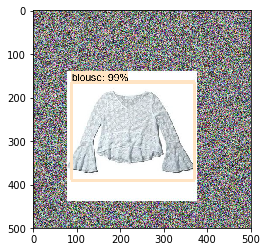

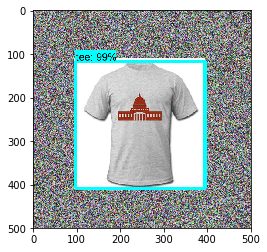

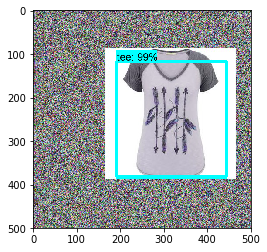

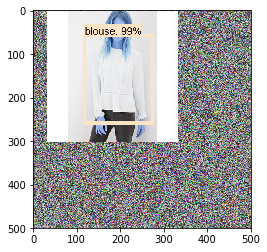

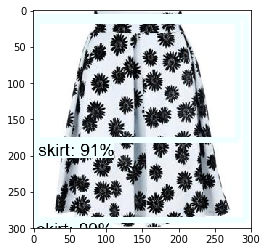

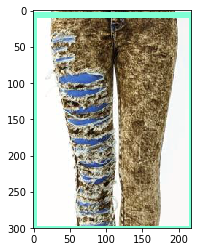

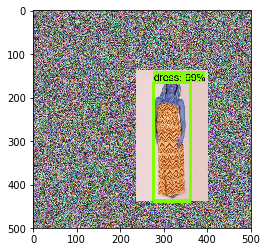

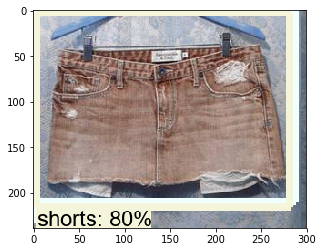

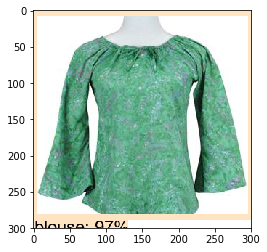

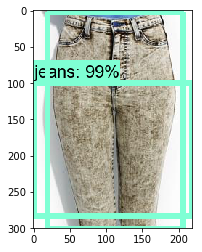

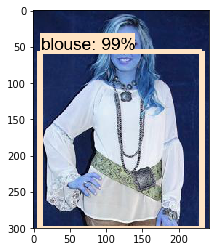

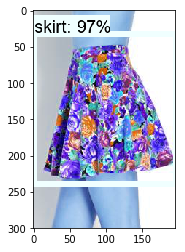

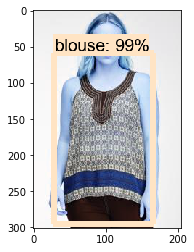

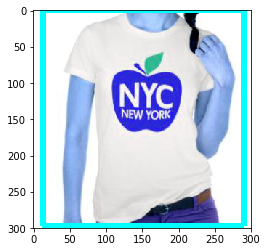

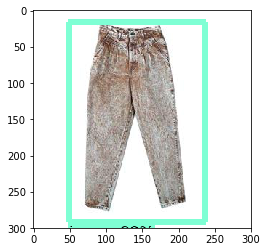

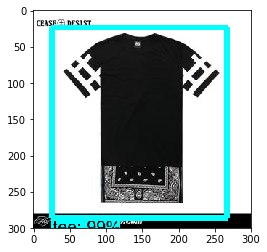

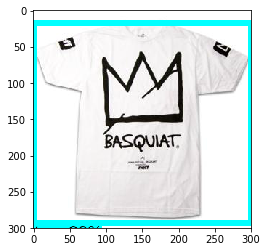

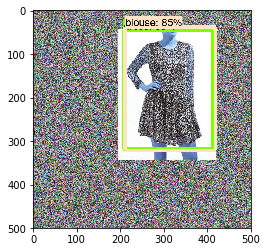

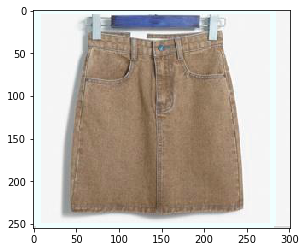

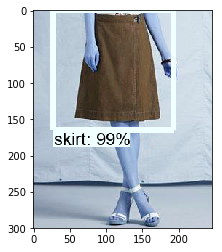

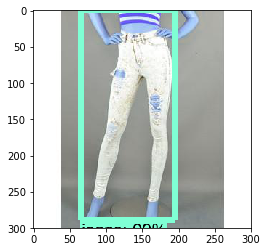

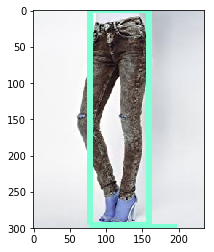

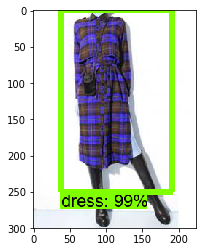

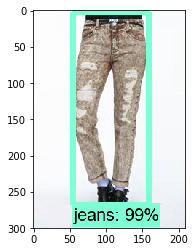

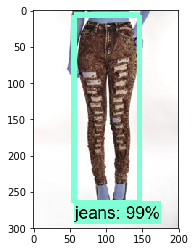

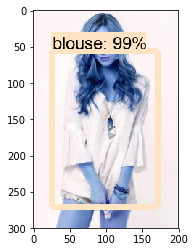

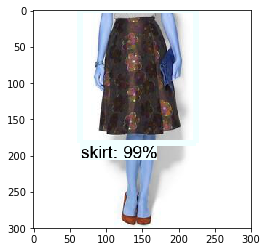

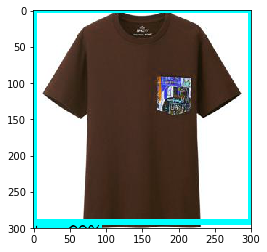

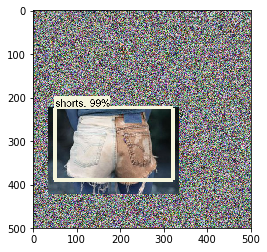

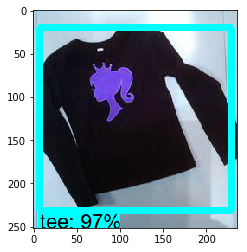

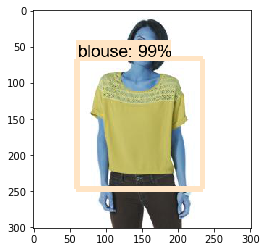

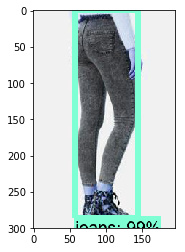

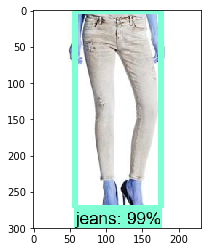

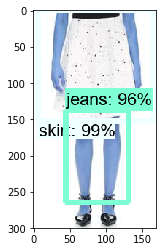

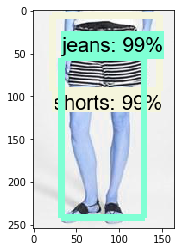

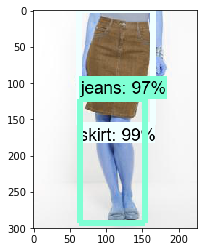

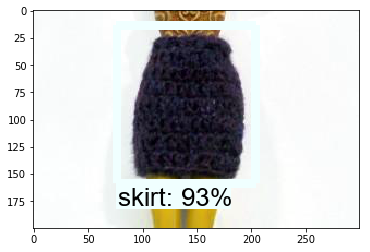

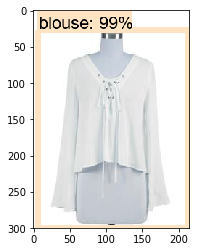

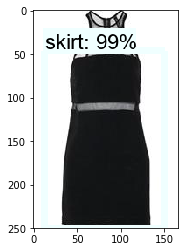

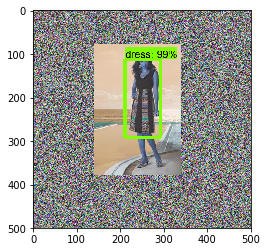

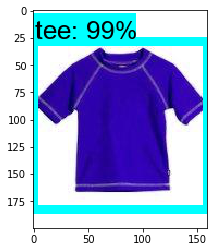

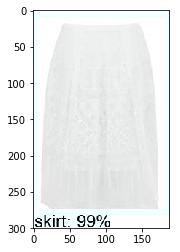

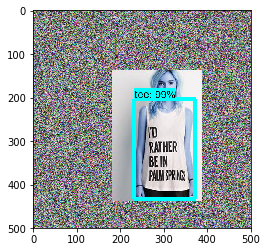

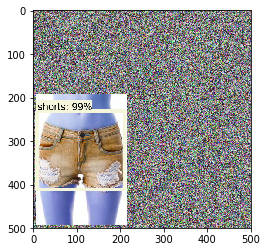

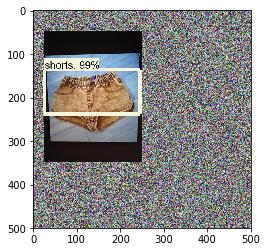

In [7]:
dir_path = 'c:\\tensorflow1\\models\\research\\object_detection\\test_images'

for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        filepath = dir_path + '\\' + file
        image = cv2.imread(filepath)
        image_expanded = np.expand_dims(image, axis=0)
        predict()